In [1]:
# Install essential libraries if needed
!pip install pandas matplotlib seaborn nltk --quiet
!pip install nltk --quiet
!pip install vaderSentiment --quiet


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 3.6 MB/s eta 0:00:00


In [2]:
# Importing libraries
import io
import re
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from collections import Counter
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('vader_lexicon')
nltk.download('stopwords')



[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
!cp -r '/content/drive/MyDrive/Data' '/content/'
!unzip /content/Data/yfinance_data.zip -d /content/
!unzip /content/Data/raw_analyst_ratings.csv.zip -d /content/

Archive:  /content/Data/yfinance_data.zip
   creating: /content/yfinance_data/
  inflating: /content/yfinance_data/GOOG_historical_data.csv  
  inflating: /content/yfinance_data/MSFT_historical_data.csv  
  inflating: /content/yfinance_data/AAPL_historical_data.csv  
  inflating: /content/yfinance_data/AMZN_historical_data.csv  
  inflating: /content/yfinance_data/META_historical_data.csv  
  inflating: /content/yfinance_data/TSLA_historical_data.csv  
  inflating: /content/yfinance_data/NVDA_historical_data.csv  
Archive:  /content/Data/raw_analyst_ratings.csv.zip
  inflating: /content/raw_analyst_ratings.csv  


In [5]:
# Load AAPL historical data
aapl_df = pd.read_csv('/content/yfinance_data/AAPL_historical_data.csv')

# Convert Date to datetime format
aapl_df['Date'] = pd.to_datetime(aapl_df['Date'])

# Preview
aapl_df.head()


,Date,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits
0,1980-12-12,0.128348,0.128906,0.128348,0.128348,0.098943,469033600,0.0,0.0
1,1980-12-15,0.122210,0.122210,0.121652,0.121652,0.093781,175884800,0.0,0.0
2,1980-12-16,0.113281,0.113281,0.112723,0.112723,0.086898,105728000,0.0,0.0
3,1980-12-17,0.115513,0.116071,0.115513,0.115513,0.089049,86441600,0.0,0.0
4,1980-12-18,0.118862,0.119420,0.118862,0.118862,0.091630,73449600,0.0,0.0


In [6]:
# Load the news data
df = pd.read_csv('/content/raw_analyst_ratings.csv')
# Preview the data
df.head()

,Unnamed: 0,headline,url,publisher,date,stock
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54-04:00,A
1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20-04:00,A
2,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07-04:00,A
3,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06-04:00,A
4,4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 11:38:59-04:00,A


In [7]:
df['headline_word_count'] = df['headline'].apply(lambda x: len(nltk.word_tokenize(str(x))))
df['headline_char_count'] = df['headline'].apply(lambda x: len(str(x)))
# Descriptive statistics
df[['headline_word_count', 'headline_char_count']].describe()

,headline_word_count,headline_char_count
count,1.407328e+06,1.407328e+06
mean,1.367637e+01,7.312051e+01
std,8.452907e+00,4.073531e+01
min,1.000000e+00,3.000000e+00
25%,8.000000e+00,4.700000e+01
50%,1.200000e+01,6.400000e+01
75%,1.600000e+01,8.700000e+01
max,1.000000e+02,5.120000e+02


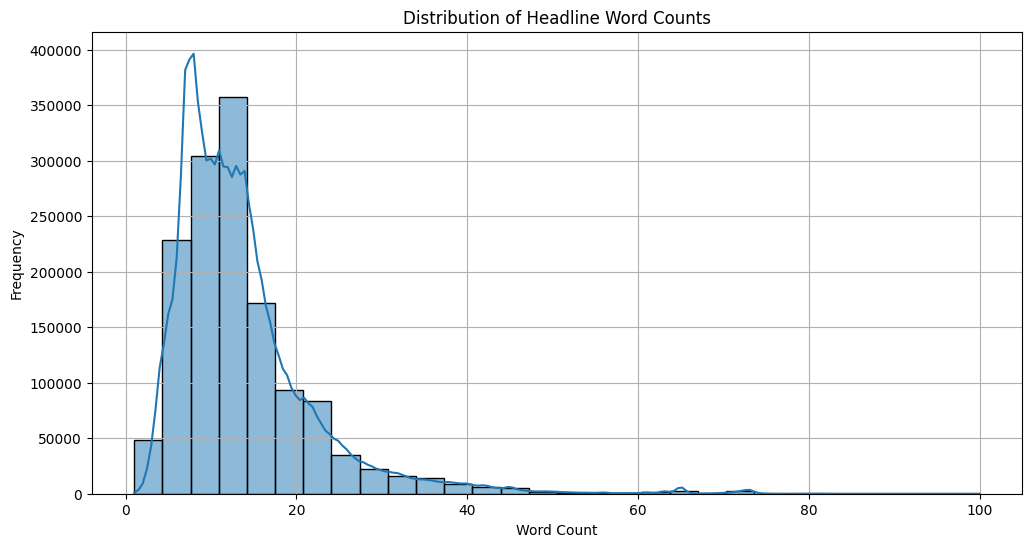

In [8]:
plt.figure(figsize=(12, 6))
sns.histplot(df['headline_word_count'], bins=30, kde=True)
plt.title('Distribution of Headline Word Counts')
plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


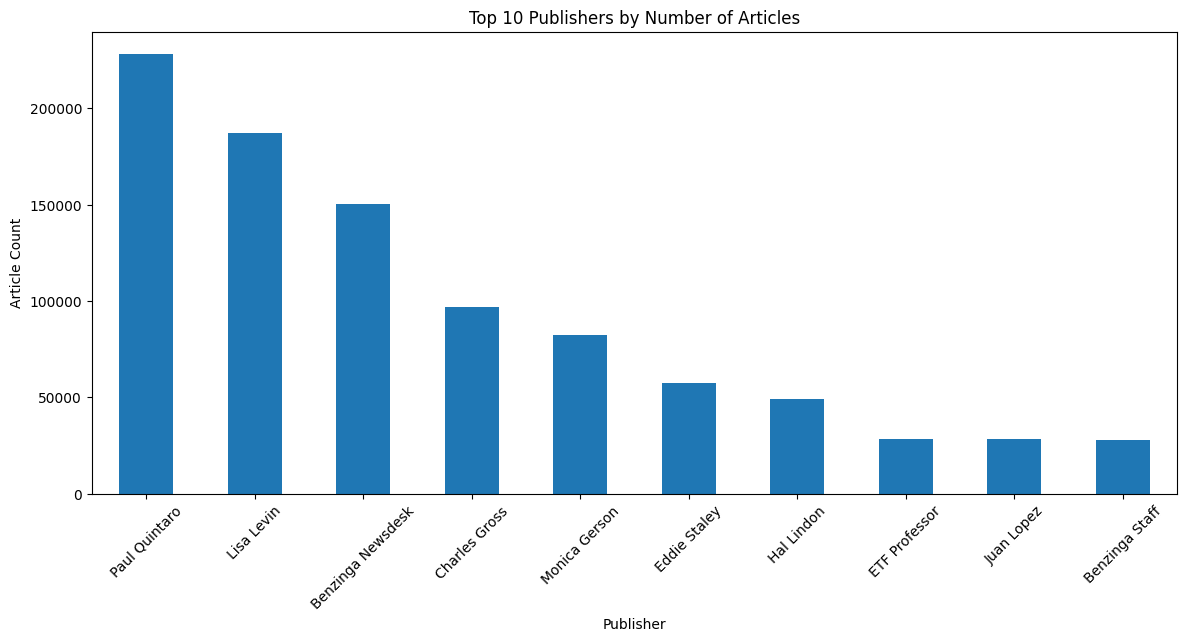

In [9]:
publisher_counts = df['publisher'].value_counts()
plt.figure(figsize=(14, 6))
publisher_counts.head(10).plot(kind='bar')
plt.title('Top 10 Publishers by Number of Articles')
plt.xlabel('Publisher')
plt.ylabel('Article Count')
plt.xticks(rotation=45)
plt.show()

In [10]:
publisher_counts.head(10)


,count
publisher,
Paul Quintaro,228373
Lisa Levin,186979
Benzinga Newsdesk,150484
Charles Gross,96732
Monica Gerson,82380
Eddie Staley,57254
Hal Lindon,49047
ETF Professor,28489
Juan Lopez,28438


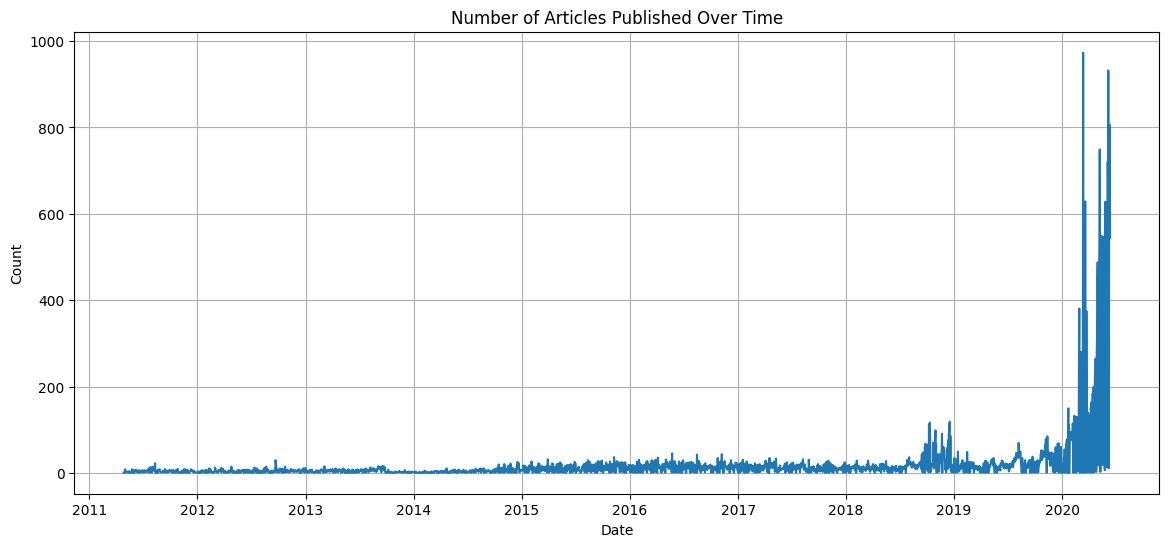

In [11]:
df['date'] = pd.to_datetime(df['date'], errors='coerce')
articles_per_day = df['date'].dt.date.value_counts().sort_index()
plt.figure(figsize=(14, 6))
articles_per_day.plot()
plt.title('Number of Articles Published Over Time')
plt.xlabel('Date')
plt.ylabel('Count')
plt.grid(True)
plt.show()

<ipython-input-13-3c3c2a6a0f1e>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='hour', data=df, palette='viridis')


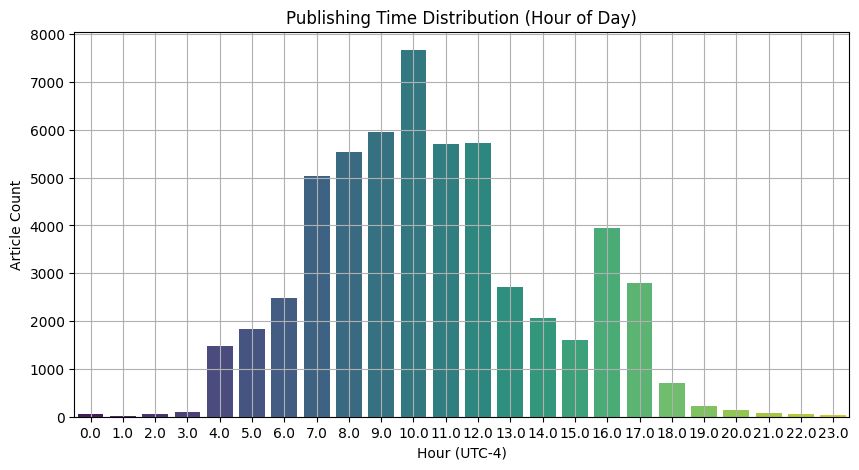

In [13]:

df['hour'] = df['date'].dt.hour
plt.figure(figsize=(10, 5))
sns.countplot(x='hour', data=df, palette='viridis')
plt.title('Publishing Time Distribution (Hour of Day)')
plt.xlabel('Hour (UTC-4)')
plt.ylabel('Article Count')
plt.grid(True)
plt.show()


<ipython-input-13-8c55474d0d1f>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=kw_df, x='count', y='word', palette='cubehelix')


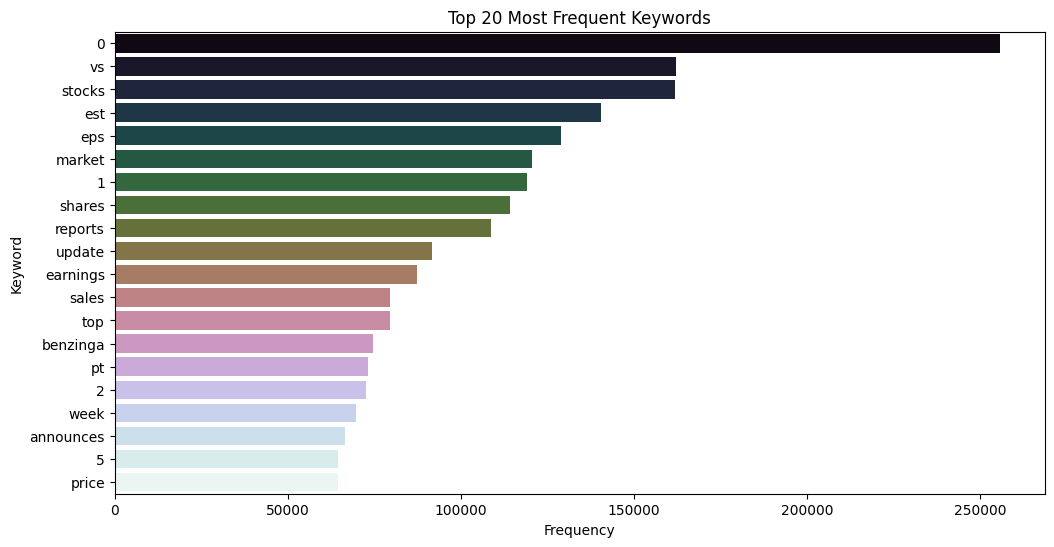

In [13]:
# Tokenize and clean
all_headlines = " ".join(df['headline'].dropna()).lower()
tokens = re.findall(r'\b\w+\b', all_headlines)
keywords = [w for w in tokens if w not in stopwords.words('english')]

# Count and plot
common_words = Counter(keywords).most_common(20)
kw_df = pd.DataFrame(common_words, columns=['word', 'count'])

plt.figure(figsize=(12, 6))
sns.barplot(data=kw_df, x='count', y='word', palette='cubehelix')
plt.title('Top 20 Most Frequent Keywords')
plt.xlabel('Frequency')
plt.ylabel('Keyword')
plt.show()


# Headlines with highest and lowest sentiment scores

In [14]:
analyzer = SentimentIntensityAnalyzer()


def get_sentiment_score(text):
    if pd.isna(text):
        return None
    return analyzer.polarity_scores(text)['compound']

df['sentiment_score'] = df['headline'].apply(get_sentiment_score)
df[['headline', 'sentiment_score']].head()

,headline,sentiment_score
0,Stocks That Hit 52-Week Highs On Friday,0.000
1,Stocks That Hit 52-Week Highs On Wednesday,0.000
2,71 Biggest Movers From Friday,0.000
3,46 Stocks Moving In Friday's Mid-Day Session,0.000
4,B of A Securities Maintains Neutral on Agilent...,0.296


In [15]:
print("Top 5 headlines with highest sentiment scores:")
print(df.nlargest(5, 'sentiment_score')[['headline', 'sentiment_score']])


Top 5 headlines with highest sentiment scores:
                                                  headline  sentiment_score
603047   Shares of several home improvement companies a...           0.9741
759479   Shares of several home improvement companies a...           0.9741
774253   Shares of several home improvement companies a...           0.9741
1175427  Traders Circulating Unconfirmed Deal Chatter o...           0.9707
463611   Donald J. Trump Tweet: 'Fighting continues but...           0.9697


In [16]:

print("\nTop 5 headlines with lowest sentiment scores:")
print(df.nsmallest(5, 'sentiment_score')[['headline', 'sentiment_score']])


Top 5 headlines with lowest sentiment scores:
                                                  headline  sentiment_score
460531   UPDATE: Death Toll Now at 22, Including Attack...          -0.9578
306784   '$CSTE reported a horrific qtr, gross margins ...          -0.9552
601635   Bank Of America Reiterates 'expected 4Q misses...          -0.9545
1143172  Bank Of America Reiterates 'expected 4Q misses...          -0.9545
458647   One Person Killed in Paris Knife Attack; Attac...          -0.9485


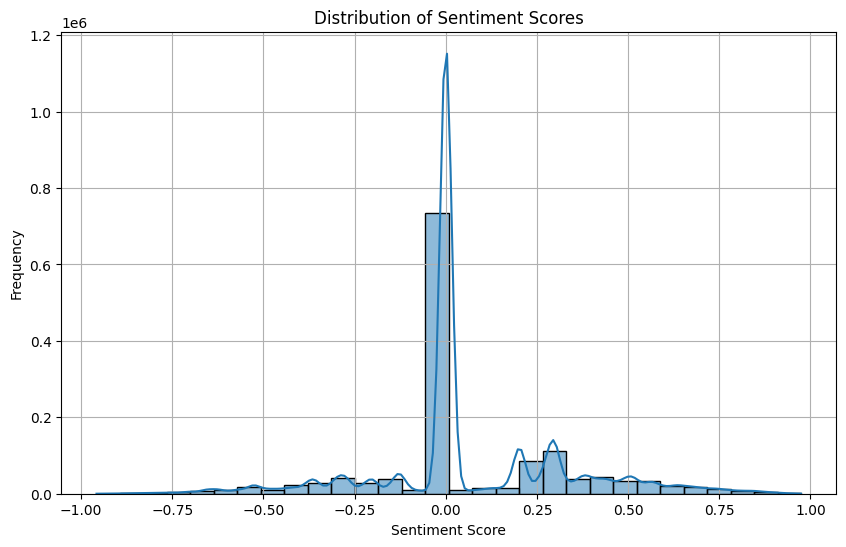

In [17]:
# Distribution of sentiment scores
plt.figure(figsize=(10, 6))
sns.histplot(df['sentiment_score'].dropna(), bins=30, kde=True)
plt.title('Distribution of Sentiment Scores')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


In [18]:

print("\n=== Sentiment Analysis ===")
print("Performing Sentiment Analysis...")

# Classify sentiment based on score
def classify_sentiment(score):
    if score is None:
        return 'Neutral' # Or some other category for missing values
    if score >= 0.05:
        return 'Positive'
    elif score <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

df['sentiment_category'] = df['sentiment_score'].apply(classify_sentiment)

print("Sentiment Distribution:")
sentiment_distribution = df['sentiment_category'].value_counts()
sentiment_distribution


=== Sentiment Analysis ===
Performing Sentiment Analysis...
Sentiment Distribution:


,count
sentiment_category,
Neutral,739332
Positive,442936
Negative,225060


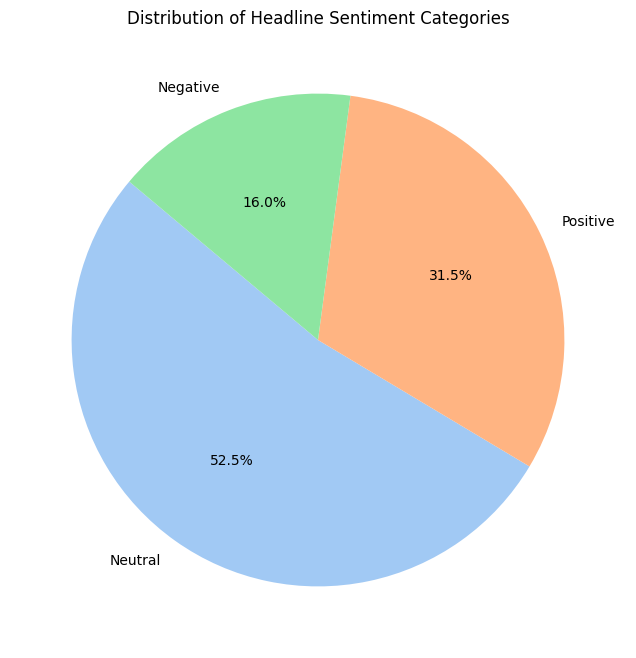

In [19]:
plt.figure(figsize=(8, 8))
plt.pie(sentiment_distribution, labels=sentiment_distribution.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
plt.title('Distribution of Headline Sentiment Categories')
plt.show()

In [20]:
sentiment_distribution_percent = df['sentiment_category'].value_counts(normalize=True) * 100
print("Sentiment Distribution (in %):")
print(sentiment_distribution_percent.round(2).astype(str) + '%')

Sentiment Distribution (in %):
sentiment_category
Neutral     52.53%
Positive    31.47%
Negative    15.99%
Name: proportion, dtype: object


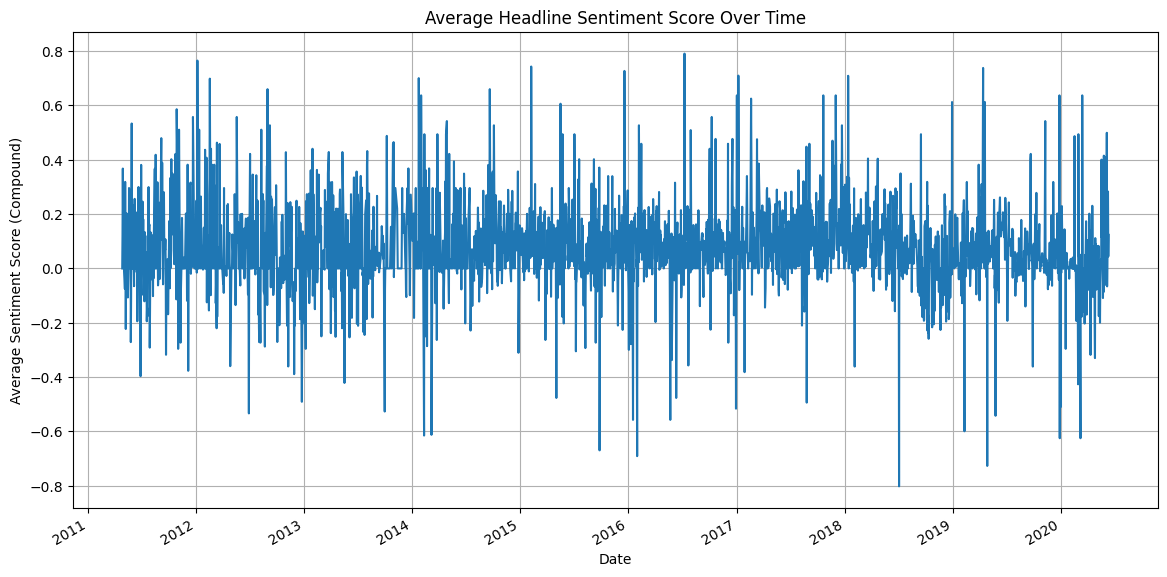

In [21]:
df_sentiment = df.dropna(subset=['date', 'sentiment_score']).copy()
average_sentiment_over_time = df_sentiment.groupby(df_sentiment['date'].dt.date)['sentiment_score'].mean()
average_sentiment_over_time.index = pd.to_datetime(average_sentiment_over_time.index)

# Plot the average sentiment score over time
plt.figure(figsize=(14, 7))
average_sentiment_over_time.plot()
plt.title('Average Headline Sentiment Score Over Time')
plt.xlabel('Date')
plt.ylabel('Average Sentiment Score (Compound)')
plt.grid(True)
plt.show()

### Topic & Phrase Analysis

In [23]:
print(f"\nTotal number of headlines: {len(df)}")


Total number of headlines: 1407328


In [24]:
print(f"Average headline length (characters): {df['headline_char_count'].mean():.2f}")
print(f"Average headline length (words): {df['headline_word_count'].mean():.2f}")

Average headline length (characters): 73.12
Average headline length (words): 13.68



Performing Topic Modeling...
[[0.02857143 0.02857143 0.02857143 0.02857143 0.88571429]
 [0.02857143 0.02857143 0.02857143 0.02857143 0.88571429]
 [0.04       0.04       0.23999789 0.04       0.6400021 ]
 ...
 [0.23886044 0.04       0.04113832 0.64000123 0.04      ]
 [0.03368577 0.03333333 0.69964763 0.19999993 0.03333333]
 [0.1417766  0.09142521 0.29822336 0.34857485 0.11999999]]


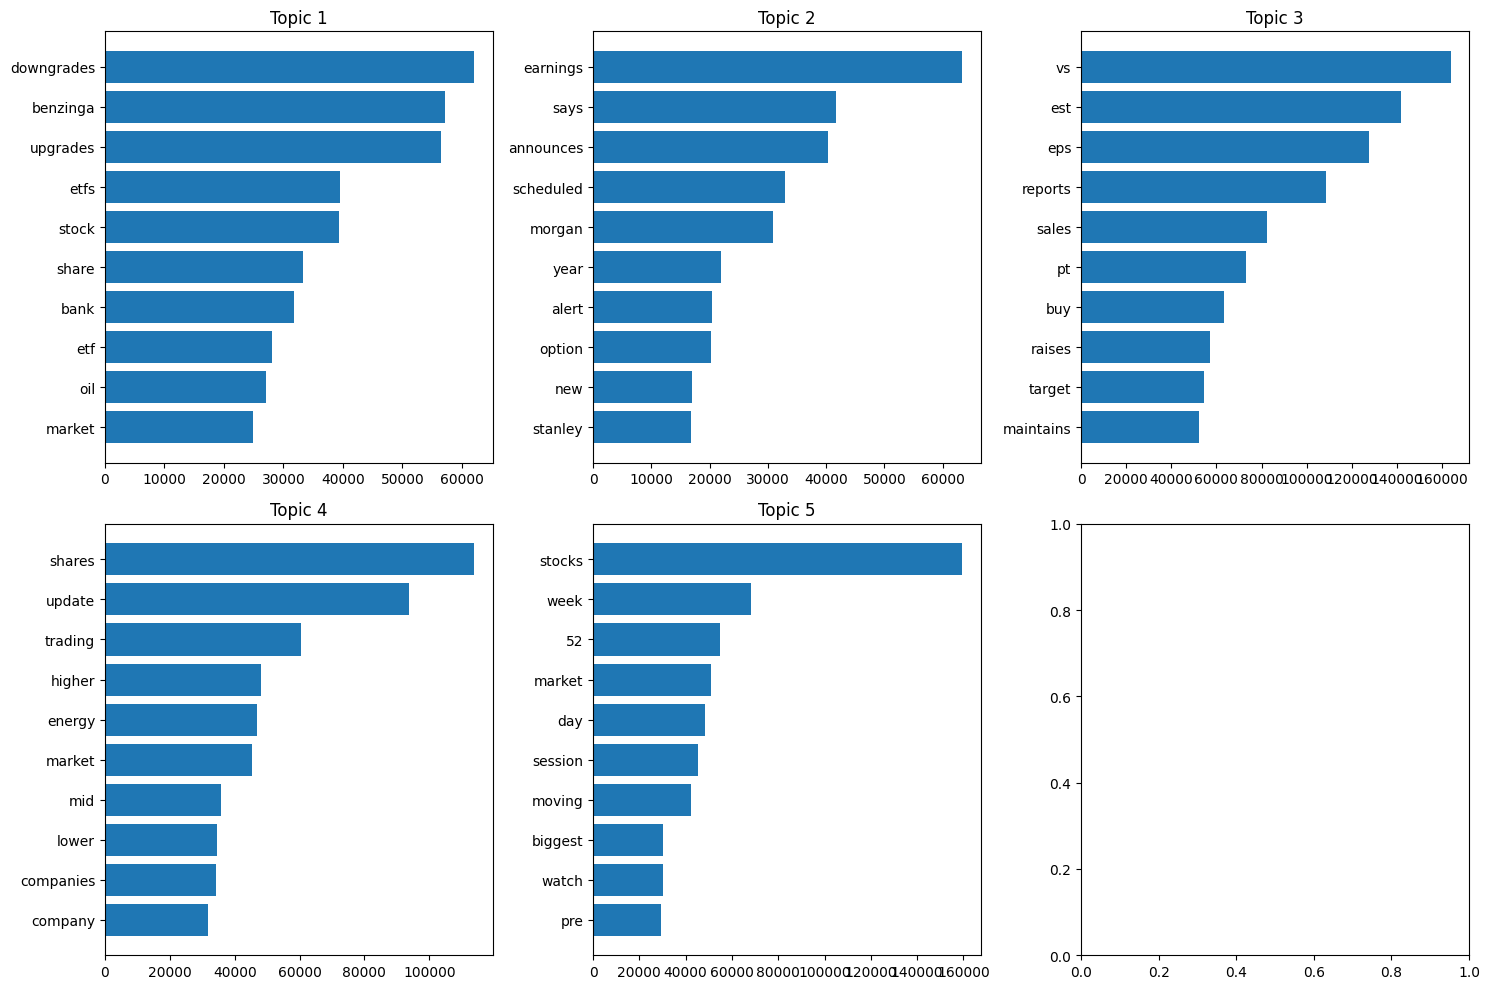

In [26]:

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

class NewsAnalyzer: # Assuming this class exists based on the method
    def __init__(self, df):
        self.df = df

    def extract_topics(self):
        """
        Performs topic modeling using LDA and visualizes topic distributions
        """
        print("\nPerforming Topic Modeling...")
        # Prepare text data
        vectorizer = CountVectorizer(max_features=1000, stop_words='english')
        doc_term_matrix = vectorizer.fit_transform(self.df['headline'])
        # Apply LDA with optimal parameters
        n_topics = 5
        lda = LatentDirichletAllocation(
            n_components=n_topics,
            max_iter=10,
            learning_method='online',
            random_state=42,
            n_jobs=-1
        )
        topic_results = lda.fit_transform(doc_term_matrix)
        print(topic_results)
        # Extract and visualize top terms for each topic
        feature_names = vectorizer.get_feature_names_out()
        n_top_words = 10
        fig, axes = plt.subplots(2, 3, figsize=(15, 10))
        axes = axes.ravel()
        for topic_idx, topic in enumerate(lda.components_):
            if topic_idx < n_topics:
                top_words_idx = topic.argsort()[:-n_top_words-1:-1]
                top_words = [feature_names[i] for i in top_words_idx]
                top_weights = [topic[i] for i in top_words_idx]
                axes[topic_idx].barh(top_words, top_weights)
                axes[topic_idx].set_title(f'Topic {topic_idx + 1}')
                axes[topic_idx].invert_yaxis()
        plt.tight_layout()
        plt.show()
        return self

# Instantiate the class and call the method
analyzer = NewsAnalyzer(df)
analyzer.extract_topics()


<ipython-input-27-93701f89f9e6>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=bg_df, x='count', y='phrase', palette='magma')


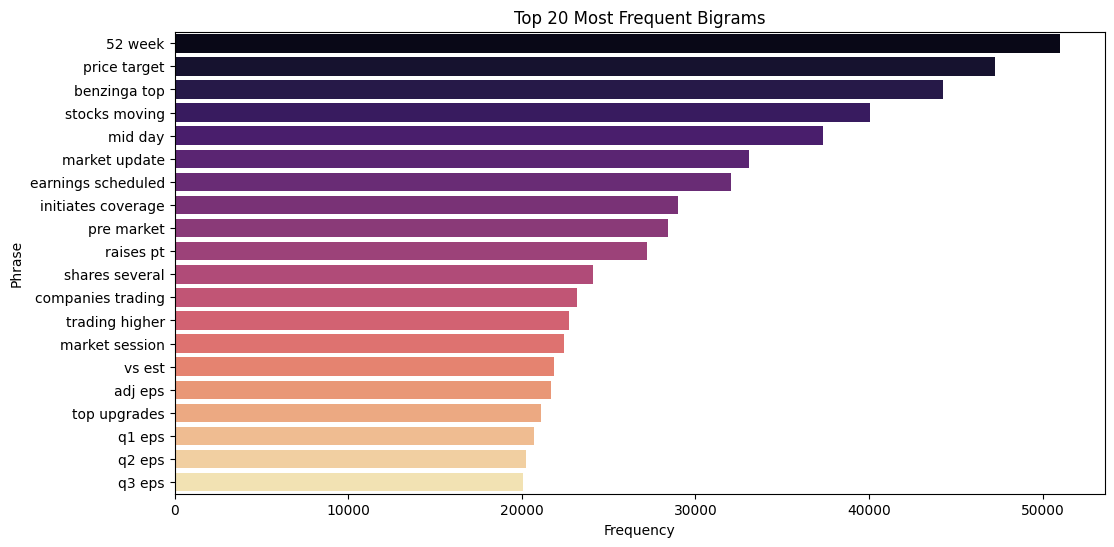

<ipython-input-27-93701f89f9e6>:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=tg_df, x='count', y='phrase', palette='plasma')


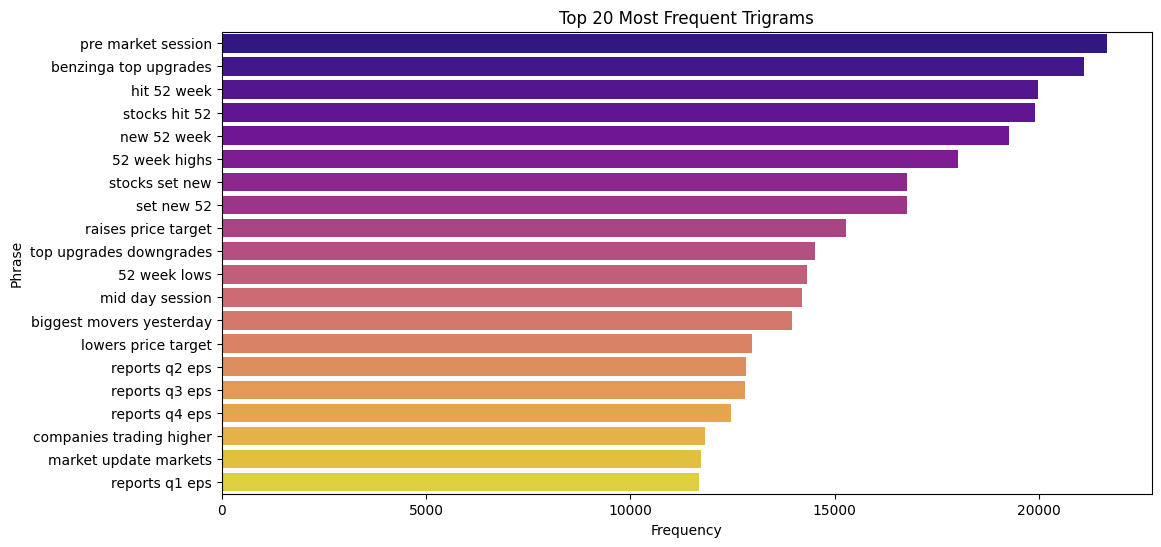

In [27]:

from nltk.corpus import stopwords

# Extract relevant phrases/bigrams/trigrams
def get_top_n_ngrams(corpus, n=None, ngram=1):
    vec = CountVectorizer(stop_words=list(stopwords.words('english')), ngram_range=(ngram, ngram)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

# Get top 20 bigrams (2-word phrases)
top_bigrams = get_top_n_ngrams(df['headline'].dropna(), n=20, ngram=2)
bg_df = pd.DataFrame(top_bigrams, columns=['phrase', 'count'])

plt.figure(figsize=(12, 6))
sns.barplot(data=bg_df, x='count', y='phrase', palette='magma')
plt.title('Top 20 Most Frequent Bigrams')
plt.xlabel('Frequency')
plt.ylabel('Phrase')
plt.show()

# Get top 20 trigrams (3-word phrases)
top_trigrams = get_top_n_ngrams(df['headline'].dropna(), n=20, ngram=3)
tg_df = pd.DataFrame(top_trigrams, columns=['phrase', 'count'])

plt.figure(figsize=(12, 6))
sns.barplot(data=tg_df, x='count', y='phrase', palette='plasma')
plt.title('Top 20 Most Frequent Trigrams')
plt.xlabel('Frequency')
plt.ylabel('Phrase')
plt.show()